Now, our current code for dividing and upscaling the images works. See `Images_Divide.ipynb`. Let us now try to apply these methods to all positive images in the dataset and save them in the folder `dataset/patch_images`.

Let us first divide the positive images.

In [3]:
# import necessary packages
import pandas as pd
import csv
from osgeo import gdal
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../dataset/labels_all.csv')
df = df[df['activity']==1]
df.head()

,Unnamed: 0,filename,lat_1,lon_1,lat_2,lon_2,activity,altitude,lat_mean,lon_mean,year,month,day,group
9,9,184.tif,13.868805,36.870401,13.866466,36.872739,1.0,801,13.867635,36.871570,2020.0,11.0,1.0,4
11,11,213.tif,13.861789,36.875078,13.859451,36.877416,1.0,797,13.860620,36.876247,2020.0,11.0,1.0,4
12,12,214.tif,13.859451,36.875078,13.857112,36.877416,1.0,791,13.858281,36.876247,2020.0,11.0,1.0,4
16,16,240.tif,13.859451,36.879755,13.857112,36.882093,1.0,800,13.858281,36.880924,2020.0,11.0,1.0,4
21,21,396.tif,13.826154,36.880058,13.823815,36.882396,1.0,784,13.824984,36.881227,2020.0,11.0,1.0,5


To encourage cleanliness within code, we create a new dataset with only the positively labelled subdivided images.

In [4]:
# Define the size of each patch
num_patches = 2 # number of patches in one dimension
patch_size = (512//num_patches, 512//num_patches) # size of each path

Let us try for one image for now.

In [5]:
name="184.tif"
original_image = cv2.imread('../dataset/skysat_images/'+name)
upscaled_patches = []
for y in range(0, 512, patch_size[0]):
    for x in range(0, 512, patch_size[1]):
        patch = original_image[y:y+patch_size[0], x:x+patch_size[1]]
        # patches.append(patch)
        upscaled_patch = cv2.resize(patch, (patch_size[1]*2, patch_size[0]*2), interpolation=cv2.INTER_LINEAR)
        upscaled_patches.append(upscaled_patch)
for i, upscaled_patch in enumerate(upscaled_patches):
    cv2.imwrite('../dataset/patch_images/'+name.split('.')[0]+f'_{i+1}'+'.tif', upscaled_patch)

Let us see if TIFF files are working.

In [9]:
def load_geotiff(file):
    ds = gdal.Open(file)
    band1 = ds.GetRasterBand(1).ReadAsArray() # Red channel
    band2 = ds.GetRasterBand(2).ReadAsArray() # Green channel
    band3 = ds.GetRasterBand(3).ReadAsArray() # Blue channel
    img = np.dstack((band1, band2, band3))
    return img

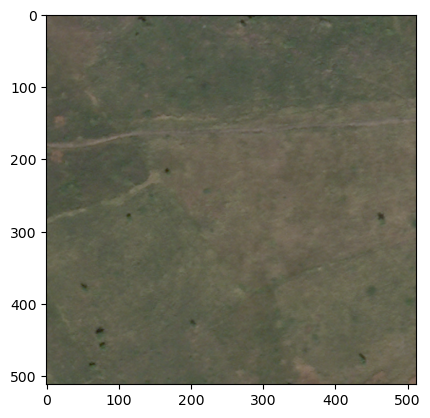

In [24]:
original_image = load_geotiff('../dataset/skysat_images/'+name)
plt.imshow(original_image)

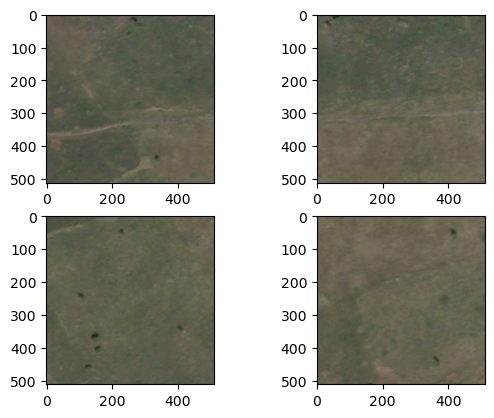

In [23]:
plt.figure()
for i in range(4):
    patch_sample = load_geotiff('../dataset/patch_images/184_'+str(i+1)+'.tif')
    plt.subplot(2, 2, i+1)
    plt.imshow(patch_sample)

Now, it's working. Let us try for the entirety of the dataset.

In [26]:
for name in df['filename']:
    original_image = cv2.imread('../dataset/skysat_images/'+name)
    upscaled_patches = []
    for y in range(0, 512, patch_size[0]):
        for x in range(0, 512, patch_size[1]):
            patch = original_image[y:y+patch_size[0], x:x+patch_size[1]]
            # patches.append(patch)
            upscaled_patch = cv2.resize(patch, (patch_size[1]*2, patch_size[0]*2), interpolation=cv2.INTER_LINEAR)
            upscaled_patches.append(upscaled_patch)
    for i, upscaled_patch in enumerate(upscaled_patches):
        cv2.imwrite('../dataset/patch_images/'+name.split('.')[0]+f'_{i+1}'+'.tif', upscaled_patch)

Let us also now subdivide the negative images.

In [3]:
df = pd.read_csv('../dataset/labels_all.csv')
df = df[df['activity']==0]
df.head()

,Unnamed: 0,filename,lat_1,lon_1,lat_2,lon_2,activity,altitude,lat_mean,lon_mean,year,month,day,group
0,0,0.tif,13.906780,36.865419,13.904441,36.867757,0.0,834,13.905610,36.866588,2020.0,11.0,1.0,-1
1,1,1.tif,13.904441,36.865419,13.902102,36.867757,0.0,834,13.903272,36.866588,2020.0,11.0,1.0,-1
2,2,2.tif,13.902102,36.865419,13.899764,36.867757,0.0,832,13.900933,36.866588,2020.0,11.0,1.0,0
3,3,20.tif,13.890409,36.867757,13.888071,36.870096,0.0,850,13.889240,36.868926,2020.0,11.0,1.0,1
4,4,26.tif,13.906780,36.870096,13.904441,36.872434,0.0,839,13.905610,36.871265,2020.0,11.0,1.0,-1


In [6]:
for name in df['filename']:
    original_image = cv2.imread('../dataset/skysat_images/'+name)
    upscaled_patches = []
    for y in range(0, 512, patch_size[0]):
        for x in range(0, 512, patch_size[1]):
            try:
                patch = original_image[y:y+patch_size[0], x:x+patch_size[1]]
            # patches.append(patch)
                upscaled_patch = cv2.resize(patch, (patch_size[1]*2, patch_size[0]*2), interpolation=cv2.INTER_LINEAR)
                upscaled_patches.append(upscaled_patch)
            except:
                print(name)
    for i, upscaled_patch in enumerate(upscaled_patches):
        cv2.imwrite('../dataset/patch_images/'+name.split('.')[0]+f'_{i+1}'+'.tif', upscaled_patch)

6014.tif
6014.tif
6014.tif
6014.tif


This proves that `6014.tif` is broken which has already been determined in `HarvestNet_Train_Model.ipynb`.

Create new csv files that account for the subdivided files. We start with relabelling patches from positive images by a creating a buffer csv file for all positive images.

In [7]:
df = pd.read_csv('../dataset/train.csv')
df = df[df['activity']==1]
df.to_csv('../dataset/train_buff_pos.csv', index=False)

In [9]:
df = pd.read_csv('../dataset/test.csv')
df = df[df['activity']==1]
df.to_csv('../dataset/test_buff_pos.csv', index=False)

In [8]:
df = pd.read_csv('../dataset/train.csv')
df = df[df['activity']==0]
df.to_csv('../dataset/train_buff_neg.csv', index=False)

In [10]:
df = pd.read_csv('../dataset/test.csv')
df = df[df['activity']==0]
df.to_csv('../dataset/test_buff_neg.csv', index=False)

In [1]:
# Function to duplicate and modify rows for subdivided images
def create_subdivided_rows(row):
    # Modify the file name for subdivided images
    original_file_name = row['filename']
    base_name, extension = original_file_name.split('.')
    new_file_names = [f"{base_name}_{i}.{extension}" for i in range(1, 5)]
    
    # Create new rows with modified file names
    subdivided_rows = []
    for new_file_name in new_file_names:
        new_row = row.copy()
        new_row['filename'] = new_file_name
        subdivided_rows.append(new_row)
    return subdivided_rows

In [4]:
# Read original CSV file
with open('../dataset/train_buff_pos.csv', mode='r') as file:
    reader = csv.DictReader(file)
    original_rows = list(reader)

In [5]:
# Create new CSV file with subdivided rows
with open('../dataset/train_buff_pos_subdivided.csv', mode='w', newline='') as file:
    fieldnames = original_rows[0].keys()
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    
    writer.writeheader()
    for original_row in original_rows:
        subdivided_rows = create_subdivided_rows(original_row)
        for subdivided_row in subdivided_rows:
            writer.writerow(subdivided_row)

In [6]:
# Read original CSV file
with open('../dataset/test_buff_pos.csv', mode='r') as file:
    reader = csv.DictReader(file)
    original_rows = list(reader)

In [7]:
# Create new CSV file with subdivided rows
with open('../dataset/test_buff_pos_subdivided.csv', mode='w', newline='') as file:
    fieldnames = original_rows[0].keys()
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    
    writer.writeheader()
    for original_row in original_rows:
        subdivided_rows = create_subdivided_rows(original_row)
        for subdivided_row in subdivided_rows:
            writer.writerow(subdivided_row)

In [13]:
# Read original CSV file
with open('../dataset/train_buff_neg.csv', mode='r') as file:
    reader = csv.DictReader(file)
    original_rows = list(reader)

In [14]:
# Create new CSV file with subdivided rows
with open('../dataset/train_buff_neg_subdivided.csv', mode='w', newline='') as file:
    fieldnames = original_rows[0].keys()
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    
    writer.writeheader()
    for original_row in original_rows:
        subdivided_rows = create_subdivided_rows(original_row)
        for subdivided_row in subdivided_rows:
            writer.writerow(subdivided_row)

In [15]:
# Read original CSV file
with open('../dataset/test_buff_neg.csv', mode='r') as file:
    reader = csv.DictReader(file)
    original_rows = list(reader)

In [16]:
# Create new CSV file with subdivided rows
with open('../dataset/test_buff_neg_subdivided.csv', mode='w', newline='') as file:
    fieldnames = original_rows[0].keys()
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    
    writer.writeheader()
    for original_row in original_rows:
        subdivided_rows = create_subdivided_rows(original_row)
        for subdivided_row in subdivided_rows:
            writer.writerow(subdivided_row)